In [19]:
from coba.benchmarks import Result
from coba.analysis import Plots
import numpy as np
import pandas as pd

In [38]:
result = Result.from_transaction_file('./memoryrl/benchmark.log')

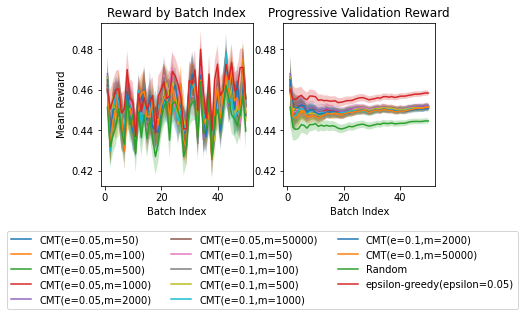

In [39]:
Plots.standard_plot(result)

In [40]:
l,s,b = result.to_pandas()

In [41]:
b.groupby('learner_id').mean().join(l).sort_values('reward')

,simulation_id,batch_index,N,reward,learner_id,family,full_name,e,m,epsilon
learner_id,,,,,,,,,,
12,251.914343,24.478672,837.186176,0.449146,12,Random,Random,NaN,NaN,NaN
11,251.914343,24.478672,837.186176,0.454226,11,CMT,"CMT(e=0.1,m=50000)",0.10,50000.0,NaN
7,251.914343,24.478672,837.186176,0.454434,7,CMT,"CMT(e=0.1,m=100)",0.10,100.0,NaN
9,251.914343,24.478672,837.186176,0.454745,9,CMT,"CMT(e=0.1,m=1000)",0.10,1000.0,NaN
5,251.914343,24.478672,837.186176,0.454836,5,CMT,"CMT(e=0.05,m=50000)",0.05,50000.0,NaN
8,251.914343,24.478672,837.186176,0.454969,8,CMT,"CMT(e=0.1,m=500)",0.10,500.0,NaN
10,251.914343,24.478672,837.186176,0.455013,10,CMT,"CMT(e=0.1,m=2000)",0.10,2000.0,NaN
6,251.914343,24.478672,837.186176,0.455103,6,CMT,"CMT(e=0.1,m=50)",0.10,50.0,NaN
1,251.914343,24.478672,837.186176,0.455152,1,CMT,"CMT(e=0.05,m=100)",0.05,100.0,NaN


In [42]:
pd.merge(l,b[b.batch_index == 49].groupby('learner_id').mean(), on='learner_id').sort_values('reward')

,learner_id,family,full_name,e,m,epsilon,simulation_id,batch_index,N,reward
3,3,CMT,"CMT(e=0.05,m=1000)",0.05,1000.0,NaN,253.494382,49.0,875.294382,0.430564
8,8,CMT,"CMT(e=0.1,m=500)",0.10,500.0,NaN,253.494382,49.0,875.294382,0.431259
12,12,Random,Random,NaN,NaN,NaN,253.494382,49.0,875.294382,0.431400
6,6,CMT,"CMT(e=0.1,m=50)",0.10,50.0,NaN,253.494382,49.0,875.294382,0.431958
11,11,CMT,"CMT(e=0.1,m=50000)",0.10,50000.0,NaN,253.494382,49.0,875.294382,0.432231
1,1,CMT,"CMT(e=0.05,m=100)",0.05,100.0,NaN,253.494382,49.0,875.294382,0.433162
10,10,CMT,"CMT(e=0.1,m=2000)",0.10,2000.0,NaN,253.494382,49.0,875.294382,0.433497
4,4,CMT,"CMT(e=0.05,m=2000)",0.05,2000.0,NaN,253.494382,49.0,875.294382,0.434893
0,0,CMT,"CMT(e=0.05,m=50)",0.05,50.0,NaN,253.494382,49.0,875.294382,0.436186
9,9,CMT,"CMT(e=0.1,m=1000)",0.10,1000.0,NaN,253.494382,49.0,875.294382,0.436661


<AxesSubplot:ylabel='Frequency'>

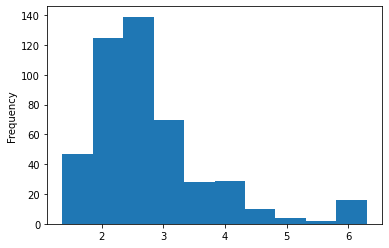

In [43]:
np.log10(s['interaction_count']).plot(kind="hist")

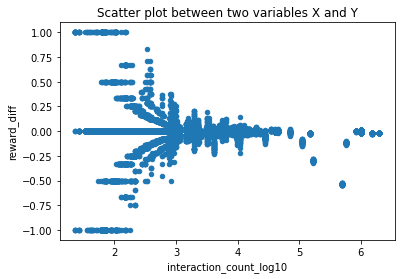

In [45]:
b.simulation_id = b.simulation_id.astype('int')
s.simulation_id = s.simulation_id.astype('int')

a = pd.merge(b[b.learner_id.isin([4])],s, on='simulation_id').sort_values('simulation_id')
c = pd.merge(b[b.learner_id.isin([13])],s, on='simulation_id').sort_values('simulation_id')

a.reward = a.reward.astype('float')
c.reward = c.reward.astype('float')

a['reward_diff']             = a.reward - c.reward
a['interaction_count_log10'] = np.log10(a.interaction_count)

a.plot.scatter(x='interaction_count_log10', y='reward_diff', title= "Scatter plot between two variables X and Y");

In [46]:
a.reward_diff.mean()

-0.006110491693387742

In [50]:
(1/s.action_count).mean()

0.4406959381371962